In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
'''
Terminar de importar las librerias necesarias
'''

2024-04-16 12:33:50.739819: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-16 12:33:50.740009: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 12:33:50.742620: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 12:33:50.774794: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 12:33:51.376814: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

'\nTerminar de importar las librerias necesarias\n'

### 1. Transferencia del aprendizaje utilizando rasgos obtenidos de una red neuronal preentrenada.

Se cargan los datos de entrada de los conjuntos de entrenamiento-validación y de prueba.

In [2]:
xtraval = np.load('./hftraval.npy')
xtest = np.load('./hftest.npy')

Los arrays xtraval y xtest contienen los rasgos obtenidos por una red neuronal preentrenada.

In [3]:
print('Forma del array (muestras, dimensiones encontradas):',xtraval.shape)
print('Forma del array (muestras, dimensiones encontradas):',xtest.shape)

Forma del array (muestras, dimensiones encontradas): (11906, 96)
Forma del array (muestras, dimensiones encontradas): (2976, 96)


Se cargan los datos de salida (que consiste en una variable dependiente) con las que se establecerá la regresión (univariable).

In [4]:
ytraval = np.load('./ytraval.npy')
ytest = np.load('./ytest.npy')

In [5]:
ytraval.shape, ytest.shape

((11906,), (2976,))

#### Instrucciones

1. Entrenar un modelo de regresión lineal utilizando las dimensiones encontradas por la red preentrenada utilizando el conjunto de entrenamiento-validación.
2. Probar el modelo obtenido por regresión lineal con el conjunto de prueba.

3. Implementar los pasos 2 y 4 con diferentes redes neuronales. 
4. Comparar los desempeños y seleccionar el mejor modelo con base en el RMSE.
5. Comparar los desempeños obtenidos en esta actividad con los obtenidos en la actividad 1.

### Regresion lineal

In [6]:
reg = LinearRegression().fit(xtraval, ytraval)

In [7]:
ypred = reg.predict(xtest)

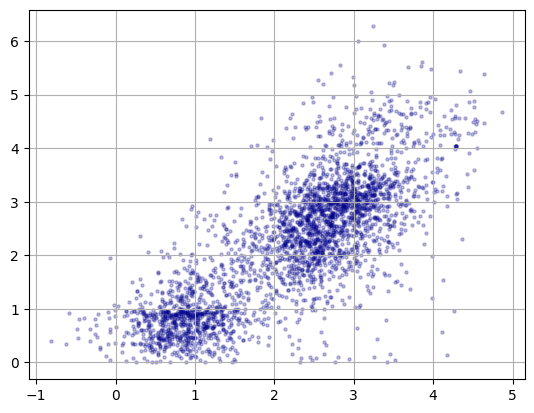

0.7547673444248391


In [8]:
plt.figure()
plt.scatter(ypred, ytest, s=5, color='darkblue', alpha=0.25)
plt.grid()
plt.show()

rmse = ((ypred - ytest)**2).mean()**0.5
print(rmse)

### Modelos 

In [9]:
features = xtraval.shape[-1]

In [10]:
def create_mlp(features = int, multiples = list, dropout = 0, name= 'multilayer_nn'):
    input_layer = tf.keras.Input(shape=(features,))

    for n, hl in enumerate(multiples):

        if n == 0: x = tf.keras.layers.Dense(hl*features)(input_layer)
        else: x = tf.keras.layers.Dense(hl*features)(x)

        x = tf.keras.layers.LayerNormalization()(x)

        if n != len(multiples) -1:
            x = tf.keras.layers.LeakyReLU(0.15)(x)
            x = tf.keras.layers.Dropout(dropout)(x)

    xs = tf.keras.layers.Dense(multiples[-1]*features)(input_layer)
    xs = tf.keras.layers.LayerNormalization()(xs)

    x = tf.keras.layers.Add()([x, xs])
    x = tf.keras.layers.LeakyReLU(0.2)(x)
    x = tf.keras.layers.Dropout(dropout)(x)

    x = tf.keras.layers.Dense(1)(x)

    return tf.keras.models.Model(inputs=input_layer, outputs=x, name=name)


Epoch 1/25


/home/luismichel/.local/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - MeanSquaredError: 1.8721 - loss: 0.5635 - val_MeanSquaredError: 0.5460 - val_loss: 0.2113
Epoch 2/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanSquaredError: 0.2726 - loss: 0.1196 - val_MeanSquaredError: 0.5293 - val_loss: 0.2058
Epoch 3/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanSquaredError: 0.1693 - loss: 0.0775 - val_MeanSquaredError: 0.5360 - val_loss: 0.2078
Epoch 4/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanSquaredError: 0.1419 - loss: 0.0655 - val_MeanSquaredError: 0.5287 - val_loss: 0.2049
Epoch 5/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanSquaredError: 0.1241 - loss: 0.0580 - val_MeanSquaredError: 0.5237 - val_loss: 0.2035
Epoch 6/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanSquaredError: 0.1009 - loss: 0.0477 - val_MeanSquaredError: 0.5290 - val_loss: 0.2051
Epoch 7/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanSquaredError: 0.0953 - loss: 0.0452 - val_MeanSquaredError: 0.5553 - val_loss: 0.2144
Epo

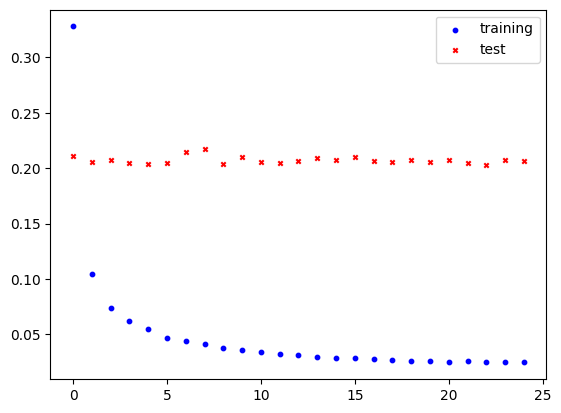

In [11]:

model = create_mlp(features=features, multiples=[4,6], dropout=0.5, name='qmof_nn')

model.compile(loss='log_cosh', metrics =['MeanSquaredError'],
                      optimizer=tf.keras.optimizers.Adamax(beta_1=0.9, beta_2=0.999, learning_rate=1e-3, decay=1e-8,))


history = tf.keras.callbacks.History()
data = model.fit(xtraval,ytraval, validation_data=(xtest,ytest), 
                    epochs=25, batch_size=64,
                    callbacks=[history],
                    shuffle=True, verbose=1)

loss_log = data.history['loss']
val_loss_log = data.history['val_loss']
mat = np.vstack((loss_log, val_loss_log)).T

plt.figure()
plt.scatter(np.arange(mat.shape[0]), mat[:,0], color = 'blue', marker='o', label='training', s=10)
plt.scatter(np.arange(mat.shape[0]), mat[:,1], color = 'red', marker='x', label='test', s=10)
plt.legend(loc='best')
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


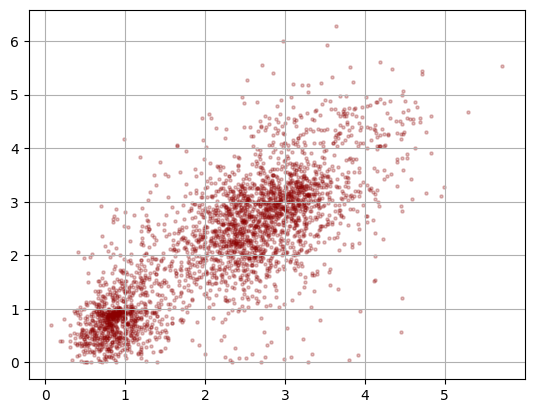

0.731176003524249


In [18]:
ypred = model.predict(xtest)

plt.figure()
plt.scatter(ypred[:,0], ytest, s=5, color='darkred', alpha=0.25)
plt.grid()
plt.show()

rmse = ((ypred[:,0] - ytest)**2).mean()**0.5
print(rmse)

### Model 2

In [19]:
def new_mlp(features, dropout=0.5, l2_reg= 0.01, name='packet_multilayer_nn'):
    
    input_layer = tf.keras.Input(shape=(features,))
    
    x = tf.keras.layers.Dense(140)(input_layer)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dense(160, kernel_regularizer = regularizers.l2(l2_reg))(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Dense(180)(x)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dense(160, kernel_regularizer = regularizers.l2(l2_reg))(x)
    x = tf.keras.layers.Dense(130, activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    
    h
    
    x = tf.keras.layers.Dense(160)(x)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dense(140, activation='relu', kernel_regularizer = regularizers.l2(l2_reg))(x)
    
    
    x = tf.keras.layers.Dense(160)(x)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dense(140, kernel_regularizer = regularizers.l2(l2_reg))(x)
    x = tf.keras.layers.Dense(130, activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    
    h
    
    x = tf.keras.layers.Dense(1)(x)
    
    return tf.keras.models.Model(inputs=input_layer, outputs=x, name=name)


Epoch 1/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - MeanSquaredError: 1.0649 - loss: 0.9501 - val_MeanSquaredError: 0.5927 - val_loss: 0.8141
Epoch 2/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanSquaredError: 0.2585 - loss: 0.6957 - val_MeanSquaredError: 0.5780 - val_loss: 0.7769
Epoch 3/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanSquaredError: 0.2415 - loss: 0.6559 - val_MeanSquaredError: 0.5408 - val_loss: 0.7343
Epoch 4/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanSquaredError: 0.2102 - loss: 0.6115 - val_MeanSquaredError: 0.5570 - val_loss: 0.7061
Epoch 5/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanSquaredError: 0.1941 - loss: 0.5706 - val_MeanSquaredError: 0.5794 - val_loss: 0.6786
Epoch 6/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - MeanSquaredError: 0.1715 - loss: 0.5251 - val_MeanSquaredError: 0.5420 - val_loss: 0.6289
Epoch 7/25
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanSquaredError: 0.1790 - loss: 0.4902 - val_MeanSquaredError: 0.5635 - val_loss:

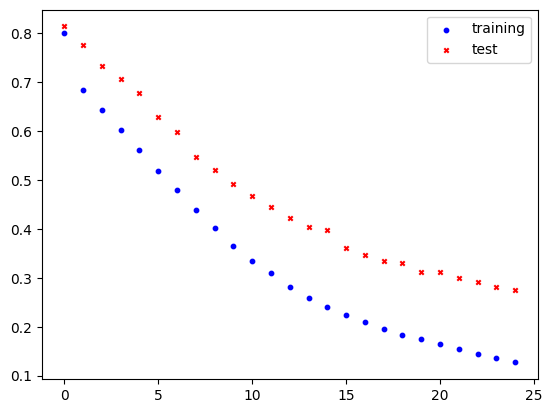

In [20]:

model2 = new_mlp(features=features, dropout=0.5, l2_reg= 0.001, name='qmof_nn_new2')

model2.compile(loss='log_cosh', metrics =['MeanSquaredError'],
                      optimizer=tf.keras.optimizers.Adamax(beta_1=0.9, beta_2=0.999, learning_rate=1e-3, decay=1e-8,))


history = tf.keras.callbacks.History()
data = model2.fit(xtraval,ytraval, validation_data=(xtest,ytest), 
                    epochs=25, batch_size=64,
                    callbacks=[history],
                    shuffle=True, verbose=1)

loss_log = data.history['loss']
val_loss_log = data.history['val_loss']
mat = np.vstack((loss_log, val_loss_log)).T

plt.figure()
plt.scatter(np.arange(mat.shape[0]), mat[:,0], color = 'blue', marker='o', label='training', s=10)
plt.scatter(np.arange(mat.shape[0]), mat[:,1], color = 'red', marker='x', label='test', s=10)
plt.legend(loc='best')
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step


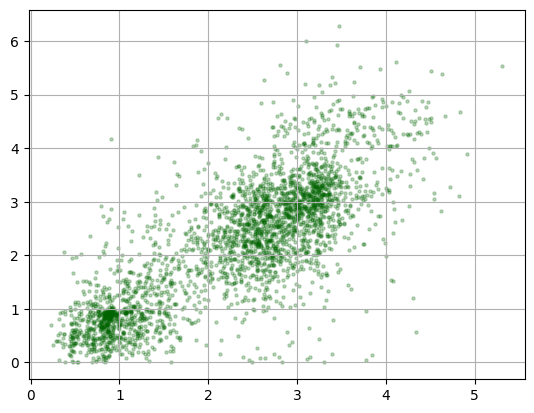

0.7283758870666894


In [21]:
ypred = model2.predict(xtest)

plt.figure()
plt.scatter(ypred[:,0], ytest, s=5, color='darkgreen', alpha=0.25)
plt.grid()
plt.show()

rmse = ((ypred[:,0] - ytest)**2).mean()**0.5
print(rmse)